<a href="https://colab.research.google.com/github/eduardofae/ERAMIA/blob/main/2025/minucursos/MC-7/minicurso_07_eramia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpretabilidade em Aprendizado de Máquina

Este Colab Notebook aborda interpretabilidade em aprendizado de máquina, com foco em modelos baseados em árvores e outras ferramentas de explicabilidade. O objetivo é compreender principalmente como e por que determinadas decisões são tomadas e como cada uam delas impacta a performance de um modelo.

## Preparação e Visualização de dados

In [1]:
!pip install pyCeterisParibus
!pip install dalex
%matplotlib inline

# importação de bibliotecas
# biblios padrão
import numpy as np
import pandas as pd

# biblios de plots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# biblio de dados
from sklearn.datasets import load_iris

# biblios umap
import umap
from sklearn.preprocessing import StandardScaler

# biblios de árvore
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# biblios de ferramentas de explicabilidade
from ceteris_paribus.explainer import explain
from ceteris_paribus.profiles import individual_variable_profile
from ceteris_paribus.plots.plots import plot
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
import shap
import ceteris_paribus
import dalex as dx
from sklearn.inspection import permutation_importance
# variáveis globais
RANDOM_STATE =  24 # <- mude aqui a seed para ver a diferença causada nos modelos

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.2-py3-none-any.whl size=1042898 sha256=e881393c232f6cf4d728e515ed3aa9a8d3b0908f3e73f0772a3d57c3cfbda17d
  Stored in directory: /root/.cache/pip/wheels/17/0a/3a/8c988bdca6acd7ce4aa949726b26c382ad1635e065bf83a175
Successfully built dalex


In [2]:
# leitura dos dados
raw_iris_data = load_iris()

# print na tela o que é produzido em raw_iris_data
print(raw_iris_data)

# nós queremos trabalhar com um objeto do tipo pandas DataFrame.
# qual é o tipo desse objeto?
print(type(raw_iris_data))

# https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset
# transformando o dataset no tipo pandas DataFrame.
iris_data = pd.DataFrame(data=raw_iris_data.data, columns=raw_iris_data.feature_names)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
# investigue seus dados

# quantas observações (linhas) e quantas características da flor (colunas) existem?
print(iris_data.shape)

# quais características (colunas) existem?
print(iris_data.columns)

iris_data

(150, 4)
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# o que está faltando nesse dataset?
# você acabou de obter o dado processado, mas, para classificação, é necessário ter as classes
# o atributo do dataset original com as classes é chamado, por padrão, de 'target'

# adição de uma nova coluna no dataset atual contendo as classes para termos o dataset completo
iris_data['target'] = raw_iris_data.target

# visualização da coluna 'target'
# nesse dataset, cada classe corresponde a uma diferente espécie do gênero Iris
# sendo 0 = 'setosa', 1 = 'versicolor' e 2 = 'virginica'
iris_data['target']

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

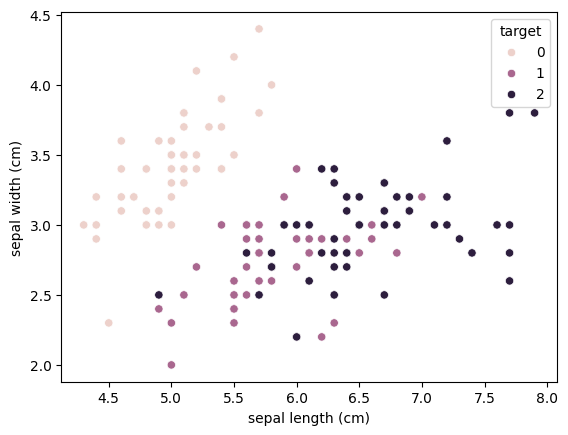

In [8]:
# visualização e exploração dos dados
# scatterplot() de um gráfico de sepal length x sepal width
# pintadas de acordo com a especie
sns.scatterplot(data=iris_data, x='sepal length (cm)', y='sepal width (cm)', hue='target')


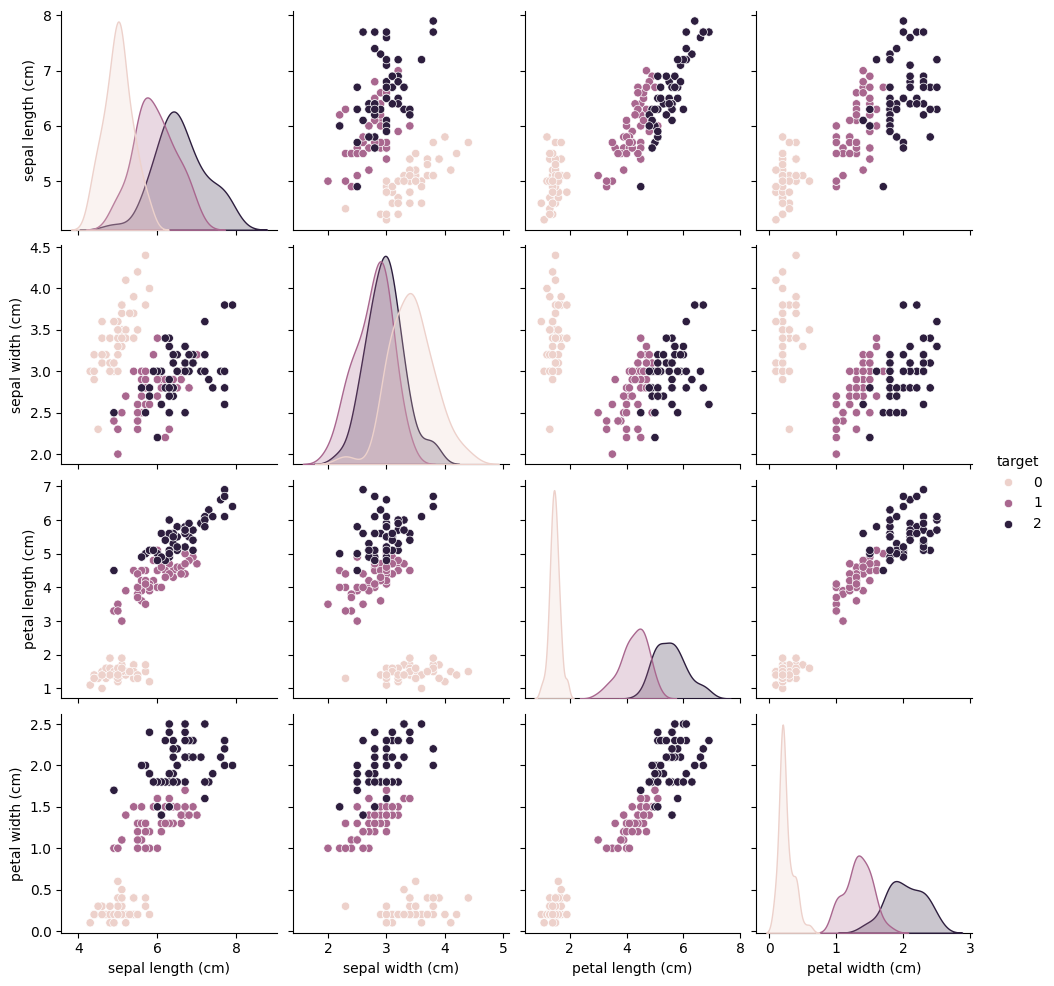

In [9]:
# observe agora todas as possíveis combinações 2 a 2
# perceba como nenhum gráfico, i.e. nenhuma característica sozinha é capaz de prontamente separar as espécies 1 e 2
sns.pairplot(iris_data, hue='target')

## Redução de Dimensionalidade

Nesse código vamos plottar um UMAP, gráfico 2D que leve em consideração *todas* as colunas da tabela, e dessa forma tenha melhor desempenho na separação das classes esperadas

In [10]:
# gere uma tabela que só possua as características de interesse
x_iris = iris_data.drop(columns='target', axis=1)

# reescale para fins de dimensão, assim nenhuma característica "pesará" mais que a outra
scaled_x_iris = StandardScaler().fit_transform(x_iris)

In [11]:
# cria o objeto redutor UMAP
reducer = umap.UMAP()

In [12]:
# treina o umap e utiliza os embeddings aprendidos para regerar cada observação num espaço bidimensional
embedding = reducer.fit_transform(scaled_x_iris)
embedding.shape


(150, 2)

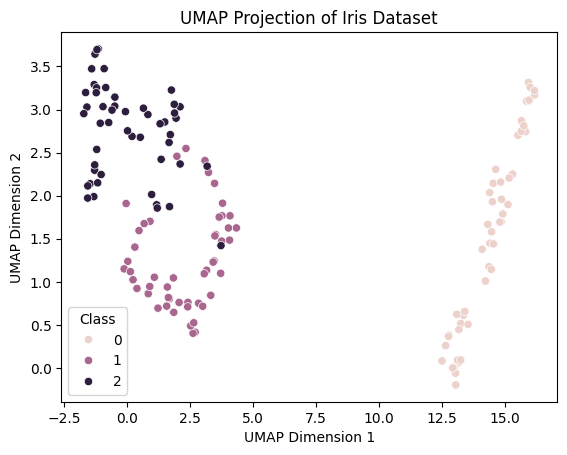

In [13]:
# adiciona as colunas geradas de embeddings
data_umap = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'])
data_umap['target'] = iris_data['target']

# e plota o umap em cima delas
plt.figure()
sns.scatterplot(data=data_umap,
                x='UMAP_1',
                y='UMAP_2',
                hue='target'
               )
plt.title('UMAP Projection of Iris Dataset')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Class')
plt.show()

## **Treinamento de um Modelo mais complexo**

**Resumo de tudo até aqui:**

*   Temos muitas características, seriam muitos plots e muitas correlações a serem analisadas, é mais difícil para uma pessoa fazer isso tudo;
*   O plot separa mas existe uma zona de maior dificuldade de separação entre as espécies 1 e 2, que em dadas situações não poderia ser tolerada (situações de diagnóstico médico, situações reais em carros auto pilotáveis...)

E agora, José?
*Aprendizado de Máquina, yippiii!!!*



### Decision Tree

In [14]:
# 1a coisa que a gente precisa é preparar nossos dados para o modelo
# para isso primeiro vamos definir em cima de que características o modelo vai treinar
# e gerar uma tabela que contenha como colunas apenas essas características

# geração de um dataset com as características de interesse e sem o "gabarito"
x_iris = iris_data.drop(columns='target', axis=1)

# posteriormente serão utilizadas as features do dataset para extração de mais informações, assim:
# criação de uma variável que seja uma lista de todas as features que você passará para o modelo
feature_list = x_iris.columns

# agora, é necessário guardarmos para o modelo quais são os gabaritos, i.e. a classe de cada observação
# a partir de um novo dataframe que só possua a coluna 'target'
# é convencionado que esse novo dataframe se chame y
y_iris = iris_data['target']

In [15]:
# agora, precisamos separar o nosso conjunto de dados.
# se convenciona de maneira geral que 70% dos dados vão para o treinamento (aprendizado)
# e 30% dos dados para testar se o modelo aprendeu
# para isso, utilize a função train_test_split() do sklearn
# abaixo um exemplo de utilização
# https://stackoverflow.com/questions/57754373/train-test-split-method-of-scikit-learn
# abaixo a  documentação oficial da função:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# separação dos dados em x e y e treino e teste de maneira estratificada
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(x_iris, y_iris,
                                                                        test_size=0.3,
                                                                        random_state=42,
                                                                        stratify=y_iris)


In [16]:
# com os dados devidamente separados, vamos agora treinar o modelo!

# geração do classificador baseado na função do sklearn https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# outros parâmetros possíveis são listados na documentação oficial
clf_dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

# treinamento do classificador
# é basicamente passar os dados de treino, na ordem tabela de caracteristicas e tabela de classes
# veja mais sobre aqui: https://scikit-learn.org/stable/developers/develop.html na sessão de 'estimators'
clf_dt.fit(X_iris_train, y_iris_train)


DecisionTreeClassifier(random_state=24)

In [17]:
# a gente acabou de >treinar< o modelo
# vamos passar para o modelo dados que ele nunca viu, ou seja, os X_test e y_test para avaliar seu aprendizado
y_pred_dt_iris = clf_dt.predict(X_iris_test)

In [18]:
# vamos agora avaliar como o modelo se saiu
report_dt_iris = classification_report(y_iris_test, y_pred_dt_iris)
print(report_dt_iris)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      0.87      0.87        15
           2       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



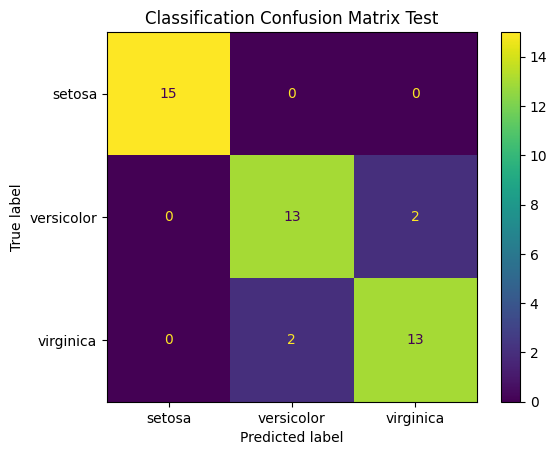

In [19]:
# outra forma de visualização: matriz de confusão
class_dict_iris = {0:'setosa', 1:'versicolor', 2:'virginica'}

fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_iris_test, y_pred_dt_iris, ax=ax)
ax.xaxis.set_ticklabels(class_dict_iris.values())
ax.yaxis.set_ticklabels(class_dict_iris.values())
_ = ax.set_title('Classification Confusion Matrix Test')

plt.show()

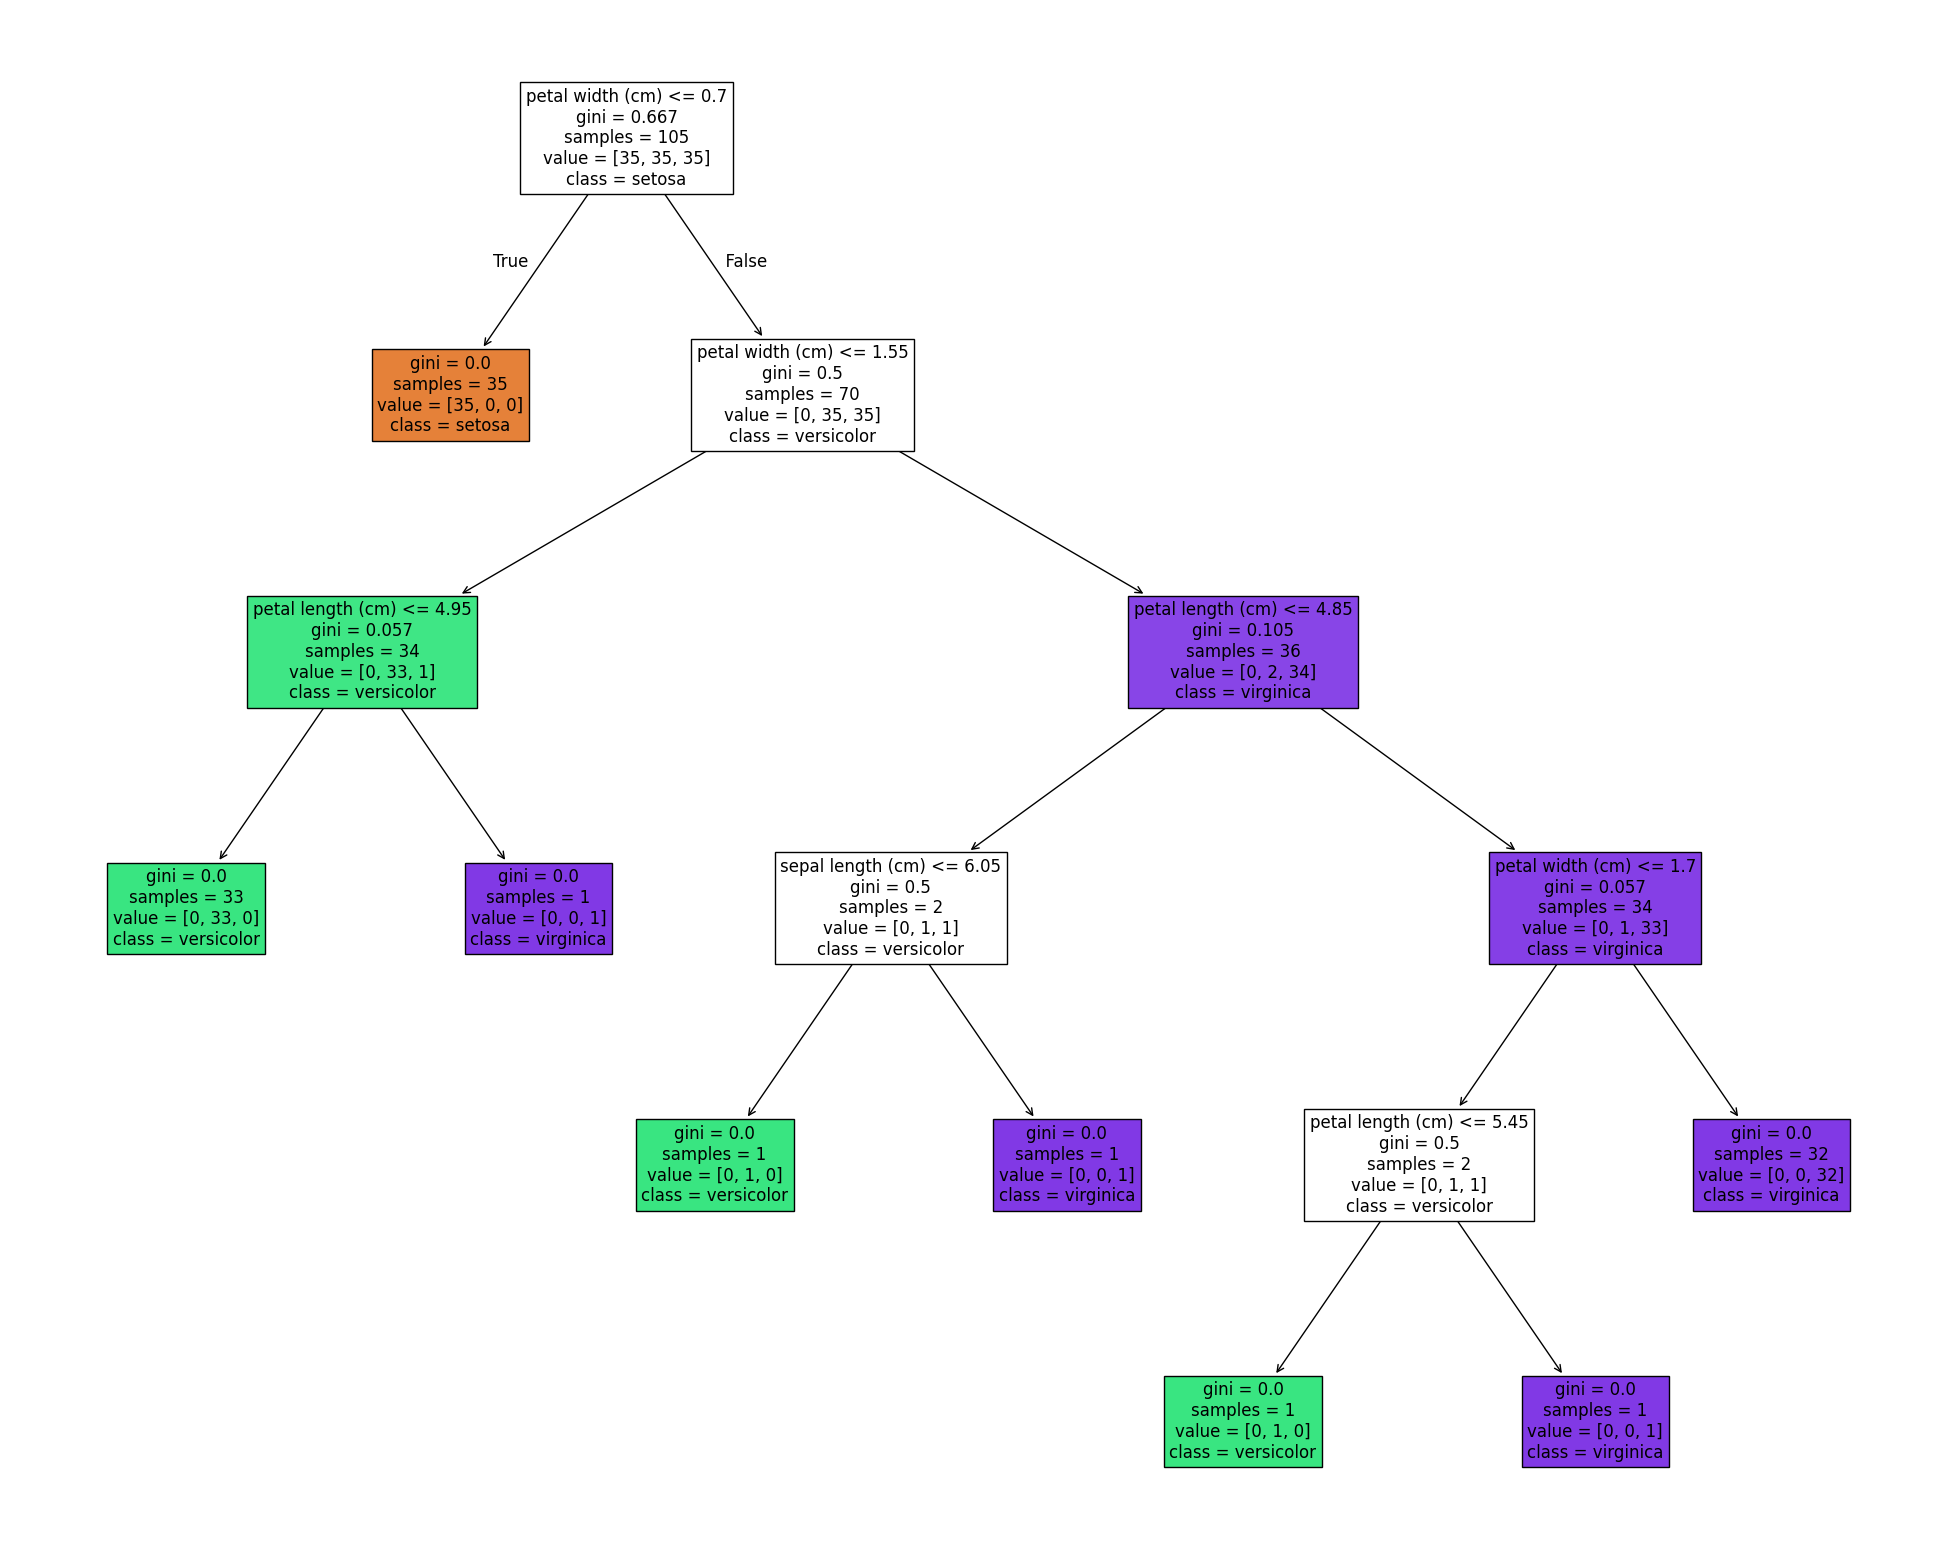

In [20]:
# por fim, mas não menos importante, vamos ver >como< o modelo aprendeu,
# e visualizar a árvore inteira que ele produziu!
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf_dt,
              feature_names=feature_list,
              class_names=class_dict_iris,
              filled=True,
              fontsize=12)

In [21]:
# outros outputs do modelo
# dizer quais características foram mais importantes para seu aprendizado
# perceba que a feature importance de um modelo de árvore de decisão é intrinseca ao modelo, tanto é que
# .feature_importances_ é um atributo chamável do classificador que foi previamente treinado
gini_feature_importance = pd.DataFrame(clf_dt.feature_importances_, index = feature_list).sort_values(0, ascending=False)
gini_feature_importance

,0
petal width (cm),0.931746
petal length (cm),0.053968
sepal length (cm),0.014286
sepal width (cm),0.000000


<Axes: title={'center': 'Gini Feature Importance'}>

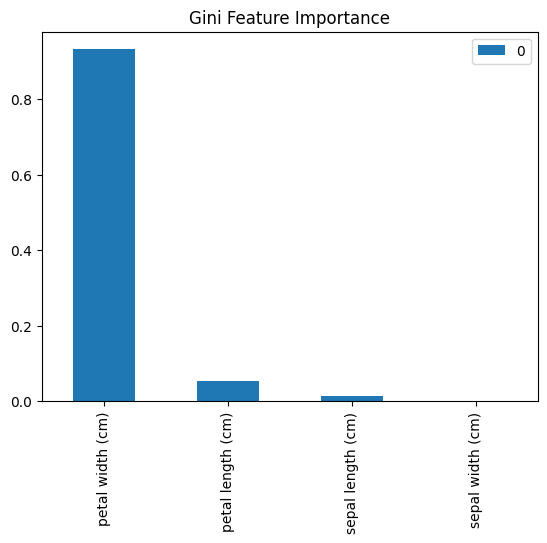

In [22]:
# para visualização, vamos plotar as feature importances em um gráfico de barras
gini_feature_importance.plot(kind='bar', title='Gini Feature Importance')

### Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



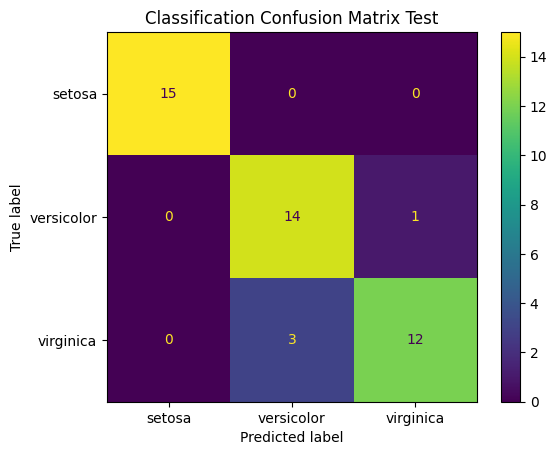

                          0
petal width (cm)   0.512077
petal length (cm)  0.367446
sepal length (cm)  0.097010
sepal width (cm)   0.023468


<Axes: >

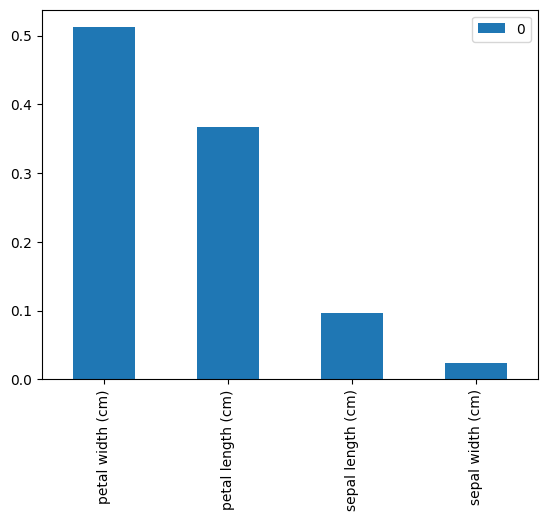

In [23]:
# mas e se eu precisar de um modelo ainda mais complexo, como eu analiso ele?

# treina um novo classificador, com um modelo mais complexo
clf_rf = RandomForestClassifier(random_state=RANDOM_STATE)

# fita aos teus dados
clf_rf.fit(X_iris_train, y_iris_train)

# realiza a predição
y_pred_rf = clf_rf.predict(X_iris_test)

# obtém métricas padrão de perfomance
report_rf_iris = classification_report(y_iris_test, y_pred_rf)
print(report_rf_iris)

# plota a nova matriz de confusão
fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_iris_test, y_pred_rf, ax=ax)
ax.xaxis.set_ticklabels(class_dict_iris.values())
ax.yaxis.set_ticklabels(class_dict_iris.values())
_ = ax.set_title('Classification Confusion Matrix Test')

plt.show()

# obtém novos valores de feature importance
feature_importance_rf = pd.DataFrame(clf_rf.feature_importances_, index = feature_list).sort_values(0, ascending=False)
print(feature_importance_rf)

feature_importance_rf.plot(kind='bar')

### Permutation Feature Importance

In [24]:
# permutation feature importance
r = permutation_importance(clf_dt, X_iris_train, y_iris_train,

                           n_repeats=30,

                           random_state=RANDOM_STATE)


for i in r.importances_mean.argsort()[::-1]:

    # if r.importances_mean[i] - 2 * r.importances_std[i] > 0:

    print(f"{raw_iris_data.feature_names[i]:<8}"

          f"{r.importances_mean[i]:.3f}"

          f" +/- {r.importances_std[i]:.3f}")

petal width (cm)0.503 +/- 0.043
petal length (cm)0.152 +/- 0.023
sepal length (cm)0.010 +/- 0.005
sepal width (cm)0.000 +/- 0.000


In [25]:
# permutation feature importance
r = permutation_importance(clf_rf, X_iris_train, y_iris_train,

                           n_repeats=30,

                           random_state=RANDOM_STATE)


for i in r.importances_mean.argsort()[::-1]:

    # if r.importances_mean[i] - 2 * r.importances_std[i] > 0:

    print(f"{raw_iris_data.feature_names[i]:<8}"

          f"{r.importances_mean[i]:.3f}"

          f" +/- {r.importances_std[i]:.3f}")

petal width (cm)0.455 +/- 0.037
petal length (cm)0.046 +/- 0.017
sepal width (cm)0.014 +/- 0.005
sepal length (cm)0.005 +/- 0.006


### Ceteris Paribus

In [44]:
# criação de um objeto explicador do modelo
# troque também para o modelo de decision tree e observe se existem diferenças
exp = dx.Explainer(clf_rf, X_iris_train, y_iris_train, label="Decision Tree Classifier")

# definir a observação a ser analisada
observation_1 = X_iris_train.iloc[2]
observation_target_1 = y_iris_train.iloc[2]

# criar o perfil de cp
cp_profile_1 = exp.predict_profile(observation_1)

# plotar observação
cp_profile_1.plot()

# repeta o código para as outras classes/observações
# <- seu código aqui


Preparation of a new explainer is initiated

  -> data              : 105 rows 4 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 105 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Decision Tree Classifier
  -> predict function  : <function yhat_proba_default at 0x7817ee039ee0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.335, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.05, mean = 0.665, max = 2.0
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 4/4 [00:00<00:00, 78.45it/s]


### ICE

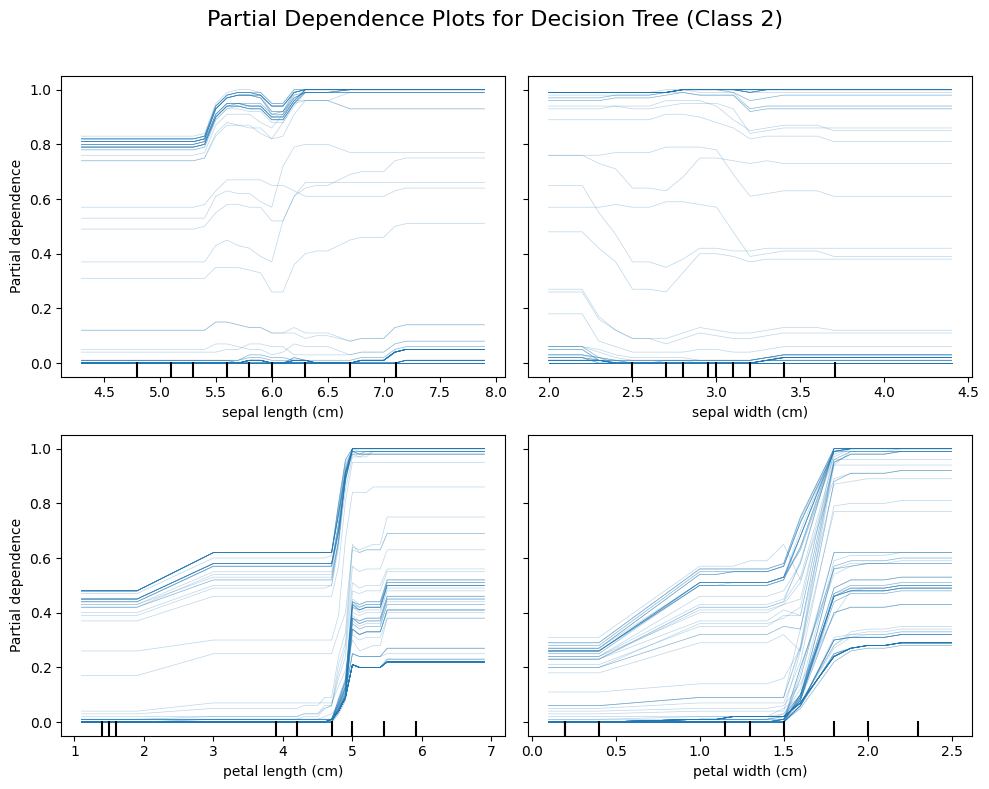

In [41]:
# Gera o plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
display = PartialDependenceDisplay.from_estimator(clf_rf,
                                                  X_iris_train,
                                                  features=feature_list,
                                                  target=2,           # altere aqui para observar para as diferentes classes
                                                  kind='individual',
                                                  ax=ax,
                                                  )

# Beautify layout
fig.suptitle("Partial Dependence Plots for Decision Tree (Class 2)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# alterando as classes, observe a relação entre os plots para a classe 1 e a classe 2.

### Partial Dependence Plot

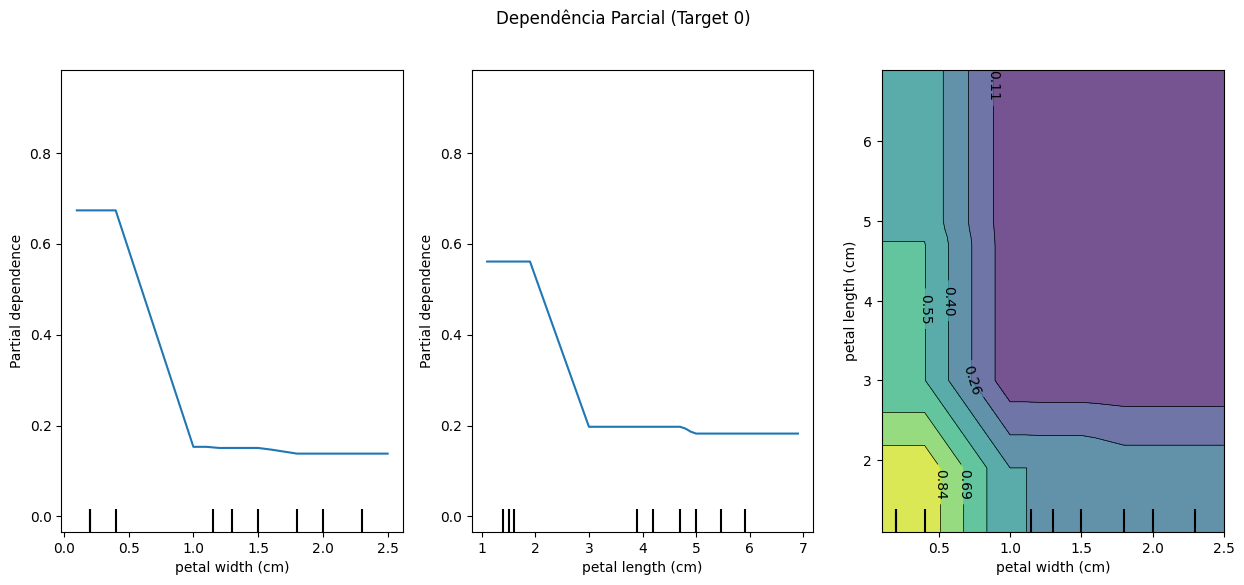

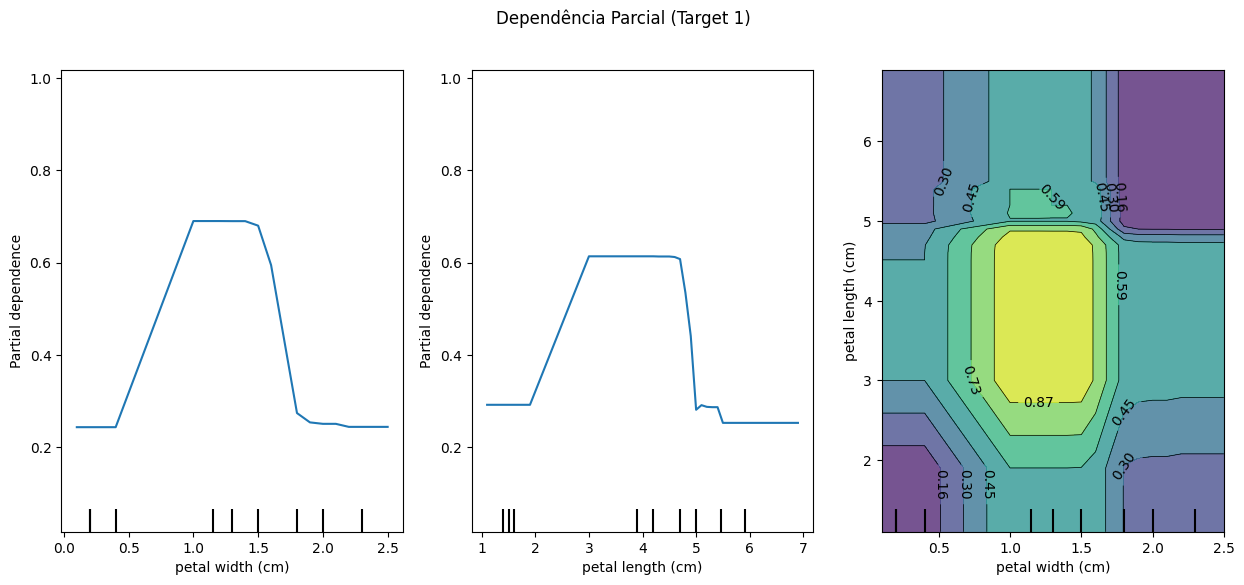

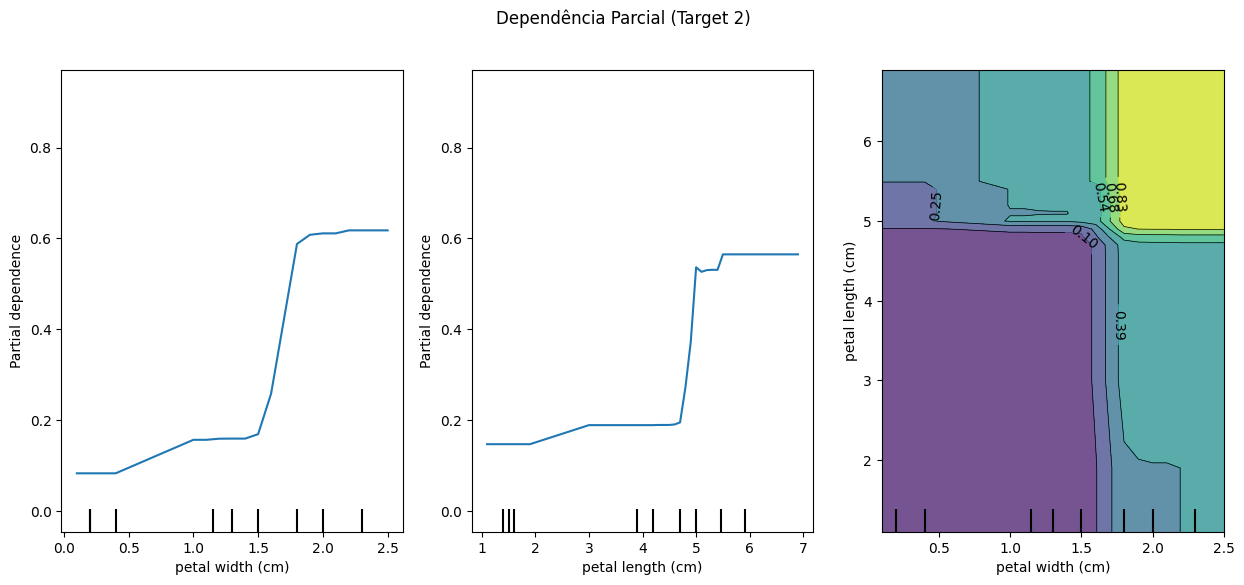

In [42]:

# Selecione os índices das features a serem observadas
features = [3, 2, (3, 2)]

# Plot para espécie 0
fig0, ax0 = plt.subplots(1, 3, figsize=(15, 6))
PartialDependenceDisplay.from_estimator(clf_rf, X_iris_train, features,
                                        target=0, ax=ax0)
fig0.suptitle('Dependência Parcial (Target 0)')
plt.show()

# Plot para espécie 1
fig1, ax1 = plt.subplots(1, 3, figsize=(15, 6))
PartialDependenceDisplay.from_estimator(clf_rf, X_iris_train, features,
                                        target=1, ax=ax1)
fig1.suptitle('Dependência Parcial (Target 1)')
plt.show()

# Plot para espécie 2
fig2, ax2 = plt.subplots(1, 3, figsize=(15, 6))
PartialDependenceDisplay.from_estimator(clf_rf, X_iris_train, features,
                                        target=2, ax=ax2)
fig2.suptitle('Dependência Parcial (Target 2)')
plt.show()

### SHAP

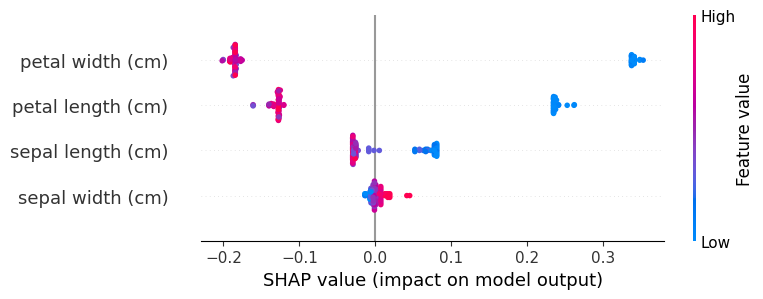

In [43]:
# shap summary plot
# gera um explicador de todo o modelo
explainer = shap.TreeExplainer(clf_rf)

# gera os shap_values dele
shap_values = explainer.shap_values(X_iris_train)

# e plota isso
shap.summary_plot(shap_values[:, :, 0], X_iris_train,
                  feature_names=raw_iris_data.feature_names)

## Dito tudo isso, agora vocês vão colocar a mão na massa! :)

1) Escolham entre os datasets de diabetes, qualidade de vinho e preços de casas (todos tarefas de regressão)

2) Re-implementem os modelos e ferramentas vistos acima a fim de obter informações sobre a situação proposta escolhida.

In [65]:
# dataset diabetes -> from sklearn.datasets import load_diabetes
# dataset de vinhos -> https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?resource=download
# dataset do preço de casas em Boston -> from sklearn.datasets import load_boston

# realize aqui a importação do dataset escolhido
# <- seu código aqui
from sklearn.datasets import load_diabetes
raw_diabetes_data = load_diabetes()

In [66]:
# transforme o dataset no formato pandas
# <- seu código aqui
diabetes_data = pd.DataFrame(data=raw_diabetes_data.data, columns=raw_diabetes_data.feature_names)

(442, 10)
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0

<Axes: xlabel='s1', ylabel='s2'>

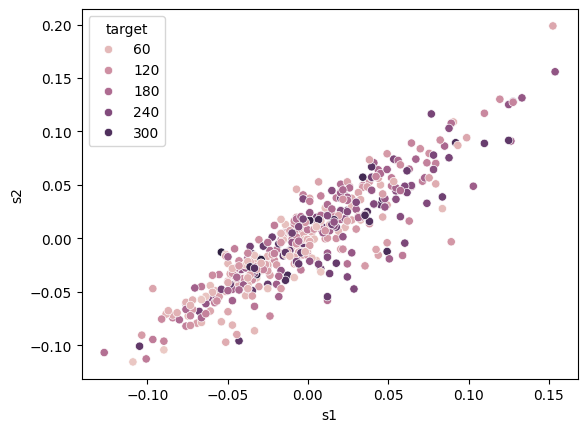

In [67]:
# realize a investigação dos seus  dados
# qual o formato do seu dataset? quantas e quais features existem?
# <- seu código aqui
print(diabetes_data.shape)
print(diabetes_data.columns)
print(diabetes_data)
# realize scatterplots ou outros plots desejados e análise as features presentes
# para pensar: as features se correlacionam? se sim, como?
# <- seu código aqui
diabetes_data['target'] = raw_diabetes_data.target
sns.scatterplot(data=diabetes_data, x='s1', y='s2', hue='target')

In [72]:
# divida seu dataset em x e y
# <- seu código aqui
x_diabetes = diabetes_data.drop(columns='target', axis=1)
y_diabetes = diabetes_data['target']
# realize a divisão dos dados entre treino e teste
# <- seu código aqui
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(x_diabetes, y_diabetes,
                                                                                        test_size=0.3,
                                                                                        random_state=42,
                                                                                        stratify=y_diabetes)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [69]:
# escolha e inicialize seu modelo, entre decision tree e random forest
# reg_dt = DecisionTreeRegressor(random_state=RANDOM_STATE) ou reg = RandomForestRegressor(random_state=RANDOM_STATE)
# <- modelo escolhido aqui
reg = RandomForestRegressor(random_state=RANDOM_STATE)
# fit seu modelo
# <- seu código aqui
reg.fit(X_diabetes_train, y_diabetes_train)
# realize as predições
# <- seu código aqui
y_pred_reg = reg.py_pred_reg = reg.predict(X_diabetes_test)
# gere o report e o plot de feature importance imbuído no modelo
# <- seu código aqui
report_rf_iris = classificareport_rf_iris = classification_report(y_diabetes_test, y_pred_reg)
feature_list = x_diabetes.columns
feature_importance_reg = pd.DataFrame(reg.feature_importances_, index=feature_list).sort_values(0, ascending=False)
feature_importance_reg.plot(kind='bar')
# para pensar: a lista de feature importances parece o que você esperaria pelos gráficos vistos anteriormente?

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
# realize os códigos para o plot de CP, ICE e PDP
# <- seu código aqui
#CP
exp = dx.Explainer(reg, X_diabetes_train, y_diabetes_train, label="Decision Tree Classifier")
observation_1 = X_diabetes_train.iloc[2]
observation_target_1 = y_diabetes_train.iloc[2]
cp_profile_1 = exp.predict_profile(observation_1)
cp_profile_1.plot()

#ICE
fig, ax = plt.subplots(nrows=2, ncol=2, figsize=(10,8))
display = PartialDependenceDisplay.from_estimator(reg,
                                                  X_diabetes_train,
                                                  features=feature_list,
                                                  target=2,
                                                  kind='individual',
                                                  ax=ax,
                                                  )
fig.suptitle("Partial Dependence Plots for Decision Tree (Class 2)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# PDP
features = [3, 2, (3, 2)]
fig0, ax0 = plt.subplots(1, 3, figsize=(15, 6))
PartialDependenceDisplay.from_estimator(reg, X_diabetes_train, features,
                                        target=0, ax=ax0)
fig0.suptitle('Dependência Parcial (Target 0)')
plt.show()
fig1, ax1 = plt.subplots(1, 3, figsize=(15, 6))
PartialDependenceDisplay.from_estimator(reg, X_diabetes_train, features,
                                        target=1, ax=ax1)
fig1.suptitle('Dependência Parcial (Target 1)')
plt.show()
fig2, ax2 = plt.subplots(1, 3, figsize=(15, 6))
PartialDependenceDisplay.from_estimator(reg, X_diabetes_train, features,
                                        target=2, ax=ax2)
fig2.suptitle('Dependência Parcial (Target 2)')
plt.show()
# para pensar: esses dados se correlacionam com as features que tinham sido obtidas anteriormente e de forma similar?